**1. 함수
$$
f(x)=\sin(x),\qquad g(x) = {f(x+h)-f(x-h) \over 2 h}$$
를 생각하자. ($h=10^{-4}$)**

**(i) matplotlib으로 함수 $f$와 $g$의 그래프를 그리시오.**

$f$를 미분하면 $\cos(x)$라는 걸 공식으로 이미 알고 있습니다.  
삼각함수의 덧셈정리와 극한 공식으로부터 증명할수 있습니다.  
현실에서 일어나는 물리적 공학적 문제들은 수학시간에 다루는 함수보다 훨씬 복잡하기 때문에 수학시간에 하듯이 종이와 연필로 analytic한 해를 구하는건 운이 매우 좋을 때뿐이고 많은 경우는 numerical하게 접근해야 합니다.  
$g$는 $f$의 도함수가 아니라 평균변화율로 정의되지만 $h$가 매우 작기 때문에 도함수와의 오차가 매우 작을 것입니다.  
그래프를 그려보면 $\cos(x)$처럼 보이네요.

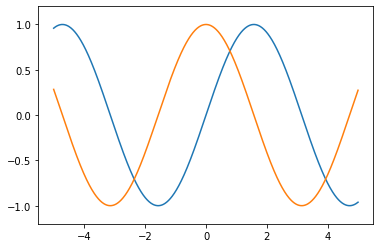

In [1]:
import numpy as np
import matplotlib.pylab as plt


def f(x):
    return np.sin(x)


def g(x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)
     
x = np.arange(-5.0, 5.0, 0.01)
y1 = f(x)
y2 = g(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.ylim(-1.2,1.2)
plt.show()

**(ii) 표준정규분포를 따라 랜덤하게 1000개의 실수 $x_k$를 뽑은 후, 오차 $|f'(x_k)-g(x_k)|$들의 평균을 구하시오.**

위에서 그린 그래프를 통해 analytic 도함수와 numerical 도함수의 오차가 작을 것이라는 걸 눈대중으로 짐작할수 있습니다.  
실제로 오차를 구해보면 무시할수 있을 정도로 매우 작다는 걸 확인할수 있습니다.

In [2]:
x=np.random.randn(1000)
error=np.mean(np.abs(np.cos(x)-g(x)))
print(error)

1.154277371497904e-09


**(iii) $f$를 시그모이드 함수로 잡고 (i),(ii)를 반복하시오.**

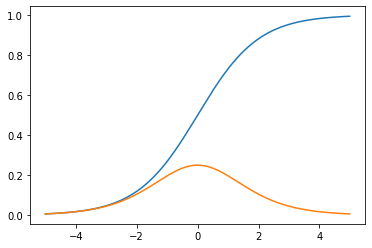

1.1705013109458707e-10


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def h(x):
    h = 1e-4
    return (sigmoid(x+h) - sigmoid(x-h)) / (2*h)


x = np.arange(-5.0, 5.0, 0.01)
y1 = sigmoid(x)
y2 = h(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

x=np.random.randn(1000)
error=np.mean(np.abs(sigmoid(x)*(1-sigmoid(x))-h(x)))
print(error)

**2. 다음 코드를 실행했을때 출력될 9개의 값을 순서대로 쓰시오.**

교재의 gradient를 구하는 코드가 어떻게 작동하는지 이해하기 위해 함수
$$
f(x,y,z) = x^2 + y^2 +z^2
$$
를 점 $(x,y,z)=(1,1,1)$에서의 미분하는 구하는 과정을 한줄 한줄 출력해서 확인하겠습니다.  
analytic하게는
$$
\nabla f(x,y,z) = ({\partial f \over \partial x}(x,y,z), {\partial f \over \partial y}(x,y,z), {\partial f \over \partial z}(x,y,z))
= (2x,2y,2z)
$$
로부터 gradient값은 $(2,2,2)$입니다.  
코드는 numerical하게 평균 변화율
$$
({f(1+0.1,1,1) - f(1-0.1,1,1) \over 2\times 0.1},{f(1,1+0.1,1) - f(1,1-0.1,1) \over 2\times 0.1},{1,1,f(1+0.1) - f(1,1,1-0.1) \over 2\times 0.1})
$$
을 구합니다.  
grad를 일단은 $[0,0.0]$으로 둡니다.

In [4]:
def f(x):
    return np.sum(x**2)

x = np.array([1.0,1.0,1.0])
grad = np.zeros_like(x)
h = 0.1

(i) idx=0:  
$x=[1,1,1]$의 첫번째 숫자를 1+0.1로 바꾸어서
$$
x=[1.1,1,1]
$$
이라 둡니다.  
여기에서 함수값
$$
fxh1 = f(1.1,1,1)=1.1^2+1+1=1.21+1+1
$$
을 구합니다.  
이번에는 $x=[1.1,1,1]$의 첫번째 숫자를 1-0.1로 바꾸어서
$$
x=[0.9,1,1]
$$
라 두고 함수값
$$
fxh2 = f(0.9,1,1)=0.9^2+1+1=0.81+1+1
$$
을 구합니다.  
평균 변화율
$$
{fxh1 - fxh2 \over 2h} = {(1.21+1+1) - (0.81+1+1) \over 0.2} = 2
$$
을 구한 후 $grad=[0,0,0]$의 첫번째 좌표를 변경하여
$$
grad = [2,0,0]
$$
이라 둡니다.  
$x$를 다시 $[1,1,1]$로 원위치 시킵니다.

(ii) idx=1:  
$x=[1,1,1]$의 두번째 숫자를 1+0.1로 바꾸어서
$$
x=[1,1.1,1]
$$
이라 둡니다.  
여기에서 함수값
$$
fxh1 = f(1,1.1,1)=1+1.1^2+1=1+1.21+1
$$
을 구합니다.  
이번에는 $x=[1,1.1,1]$의 두번째 숫자를 1-0.1로 바꾸어서
$$
x=[1,0.9,1]
$$
라 두고 함수값
$$
fxh2 = f(1,0.9,1)=1+0.9^2+1=1+0.81+1
$$
을 구합니다.  
평균 변화율
$$
{fxh1 - fxh2 \over 2h} = {(1+1.21+1) - (1+0.81+1) \over 0.2} = 2
$$
을 구한 후 $grad=[2,0,0]$의 두번째 좌표를 변경하여
$$
grad = [2,2,0]
$$
이라 둡니다.  
$x$를 다시 $[1,1,1]$로 원위치 시킵니다.

(iii) idx=2:  
$x=[1,1,1]$의 세번째 숫자를 1+0.1로 바꾸어서
$$
x=[1,1,1.1]
$$
이라 둡니다.  
여기에서 함수값
$$
fxh1 = f(1,1,1.1)=1+1+1.1^2=1+1+1.21
$$
을 구합니다.  
이번에는 $x=[1,1,1.1]$의 세번째 숫자를 1-0.1로 바꾸어서
$$
x=[1,1,0.9]
$$
라 두고 함수값
$$
fxh2 = f(1,1,0.9)=1+1+0.9^2=1+1+0.81
$$
을 구합니다.  
평균 변화율
$$
{fxh1 - fxh2 \over 2h} = {(1+1+1.21) - (1+1+0.81) \over 0.2} = 2
$$
을 구한 후 $grad=[2,2,0]$의 세번째 좌표를 변경하여
$$
grad = [2,2,2]
$$
이라 둡니다.  
$x$를 다시 $[1,1,1]$로 원위치 시킵니다.

In [5]:
for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = float(tmp_val) + h
    print(x)
    fxh1 = f(x)
    
    x[idx] = float(tmp_val) - h
    print(x)
    fxh2 = f(x)
    
    grad[idx] = (fxh1 - fxh2) / (2*h)
    print(grad)
    
    x[idx] = tmp_val

[1.1 1.  1. ]
[0.9 1.  1. ]
[2. 0. 0.]
[1.  1.1 1. ]
[1.  0.9 1. ]
[2. 2. 0.]
[1.  1.  1.1]
[1.  1.  0.9]
[2. 2. 2.]


**3. 함수 $$f(x,y)=2x^3+xy^2+5x^2+y^2$$을 생각하자.**

**(i) 점 $(0,1)$에서 함수 $f$가 가장 빨리 증가하는 방향, 가장 빨리 감소하는 방향, 순간 변화율이 0인 방향을 구하시오.**

$x$와 $y$로 편미분하여
$$
\nabla f(x,y) = ({\partial f \over \partial x} (x,y), {\partial f \over \partial y} (x,y)) = (6x^2+y^2+10x, 2xy+2y)
$$
를 구합니다.  
점 $(0,1)$에서 함수 $f$가 가장 빨리 증가하는 방향은 gradient방향
$$
\nabla f(0,1) = (1,2)
$$
이고 가장 빨리 감소하는 방향은 gradeint의 반대방향
$$
-\nabla f(0,1) = (-1,-2)
$$
이며 순간변화율이 0인 방향은 gradient에 수직인 방향
$$
(2,-1), \qquad (-2,1)
$$
입니다.

**(ii) $\vec{v}=(\cos \theta, \sin \theta)$라 할 때, $\theta$에 관한  함수
$$
g(\theta) = {f\left((0,1)+h\vec{v}\right)-f\left((0,1)-h\vec{v}\right) \over 2 h}, \qquad \theta \in [-\pi,\pi]
$$
의 그래프를 그리시오. ($h=10^{-4}$)**

$h$가 0으로 가까이 갈때 주어진 식의 극한값은 $\vec v$방향으로의 방향미분
$$
D_{\vec v} f(0,1)
$$
입니다.  
$h=10^{-4}$으로 고정한 값 $g(\theta)$는 $D_{\vec v} f(0,1)$를 수치적으로 근사한 값입니다.

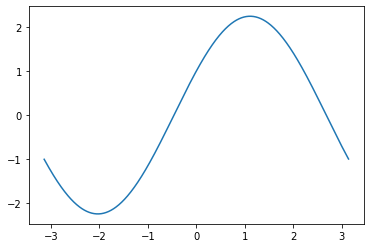

In [6]:
def f(x,y):
    return 2*x**3 + x*(y**2) + 5*x**2 + y**2


def g(theta):
    h = 1e-4
    return (f(h*np.cos(theta),1+h*np.sin(theta)) - f(-h*np.cos(theta),1-h*np.sin(theta))) / (2*h)
     
theta = np.arange(-np.pi, np.pi, 0.01)


y = g(theta)

plt.plot(theta, y)
plt.show()

**(iii) (i)에서 구한 방향의 편각을 각각 구하고 (ii)에서 구한 그래프위에 점으로 표시하시오.**

가장 빨리 증가하는 방향 $\nabla f(0,1) = (1,2)$의 편각은
$$
\theta = \arctan 2
$$
이고
가장 빨리 감소하는 방향 $-\nabla f(0,1)$의 편각은 180도 돌려서
$$
\theta = \arctan 2 - \pi
$$
이며
순간변화율이 0인 방향은 90도 돌려서
$$
\theta = \arctan 2 \pm {\pi \over 2}
$$
입니다.
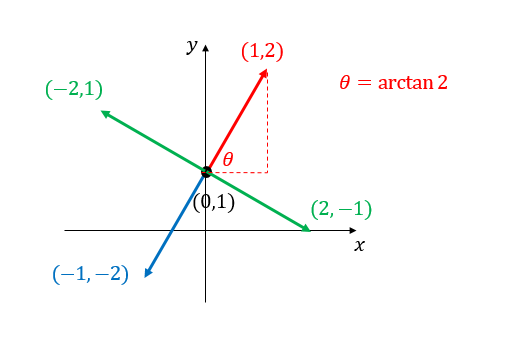

(ii)에서 numerical하게 구한 방향미분의 그래프 위에 빨간색으로 점을 찍어보면 각각 최대점, 최소점, $x$절편에 근사적으로 찍힌다는 것을 눈으로 확인할 수 있습니다.

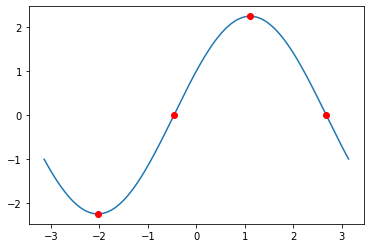

In [7]:
plt.plot(theta, g(theta))

x = np.array([np.arctan(2),np.arctan(2)-np.pi, np.arctan(2)+np.pi/2, np.arctan(2)-np.pi/2])
plt.plot(x,g(x),'ro')
plt.show()